# Machine Learning using Python 
Exam – Paper 1
## Mayur V kolki PGA14

# Part II: Time Series

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#ADF (augmented dickey-fuller test)
from statsmodels.tsa.stattools import adfuller,acf,pacf

In [3]:
#Ljung-Box test
import statsmodels.api as sm

In [4]:
#ARIMA model

from statsmodels.tsa.arima_model import ARIMA

In [5]:
#read the data 
path ="C:/Users/mayur/Desktop/datascience DELL/pythonstorage/dataset_ML/Paper1/MonthWiseMarketArrivals_Clean.csv"
data=pd.read_csv(path)

In [6]:
data

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
0,ABOHAR(PB),January,2005,2350,404,493,446,PB,ABOHAR,January-2005
1,ABOHAR(PB),January,2006,900,487,638,563,PB,ABOHAR,January-2006
2,ABOHAR(PB),January,2010,790,1283,1592,1460,PB,ABOHAR,January-2010
3,ABOHAR(PB),January,2011,245,3067,3750,3433,PB,ABOHAR,January-2011
4,ABOHAR(PB),January,2012,1035,523,686,605,PB,ABOHAR,January-2012
...,...,...,...,...,...,...,...,...,...,...
10222,YEOLA(MS),December,2011,131326,282,612,526,MS,YEOLA,December-2011
10223,YEOLA(MS),December,2012,207066,485,1327,1136,MS,YEOLA,December-2012
10224,YEOLA(MS),December,2013,215883,472,1427,1177,MS,YEOLA,December-2013
10225,YEOLA(MS),December,2014,201077,446,1654,1456,MS,YEOLA,December-2014


In [7]:
data.dtypes

market      object
month       object
year         int64
quantity     int64
priceMin     int64
priceMax     int64
priceMod     int64
state       object
city        object
date        object
dtype: object

In [8]:
nc=data.select_dtypes(exclude='object').columns.values
fc=data.select_dtypes(include='object').columns.values

In [9]:
nc

array(['year', 'quantity', 'priceMin', 'priceMax', 'priceMod'],
      dtype=object)

In [10]:
fc

array(['market', 'month', 'state', 'city', 'date'], dtype=object)

In [11]:
#EDA
#NULL CHECK
data.isnull().sum()

market      0
month       0
year        0
quantity    0
priceMin    0
priceMax    0
priceMod    0
state       0
city        0
date        0
dtype: int64

In [12]:
#0 check 
data[nc][data[nc]==0].count()

year        0
quantity    0
priceMin    0
priceMax    0
priceMod    0
dtype: int64

In [13]:
data.dtypes

market      object
month       object
year         int64
quantity     int64
priceMin     int64
priceMax     int64
priceMod     int64
state       object
city        object
date        object
dtype: object

In [14]:
#data summary 
data.describe(include="all")

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
count,10227,10227,10227.000000,1.022700e+04,10227.000000,10227.000000,10227.000000,10227,10227,10227
unique,120,12,NaN,NaN,NaN,NaN,NaN,21,117,242
top,LASALGAON(MS),February,NaN,NaN,NaN,NaN,NaN,MS,LASALGAON,September-2015
freq,242,930,NaN,NaN,NaN,NaN,NaN,4354,242,97
mean,NaN,NaN,2009.022294,7.660488e+04,646.944363,1212.760731,984.284345,NaN,NaN,NaN
std,NaN,NaN,4.372841,1.244087e+05,673.121850,979.658874,818.471498,NaN,NaN,NaN
min,NaN,NaN,1996.000000,2.000000e+01,16.000000,145.000000,80.000000,NaN,NaN,NaN
25%,NaN,NaN,2006.000000,8.898000e+03,209.000000,557.000000,448.000000,NaN,NaN,NaN
50%,NaN,NaN,2009.000000,2.746000e+04,440.000000,923.000000,747.000000,NaN,NaN,NaN
75%,NaN,NaN,2013.000000,8.835650e+04,828.000000,1527.000000,1248.000000,NaN,NaN,NaN


In [15]:
data["date"] = data["month"] + "-" + data["year"].map(str)
data

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
0,ABOHAR(PB),January,2005,2350,404,493,446,PB,ABOHAR,January-2005
1,ABOHAR(PB),January,2006,900,487,638,563,PB,ABOHAR,January-2006
2,ABOHAR(PB),January,2010,790,1283,1592,1460,PB,ABOHAR,January-2010
3,ABOHAR(PB),January,2011,245,3067,3750,3433,PB,ABOHAR,January-2011
4,ABOHAR(PB),January,2012,1035,523,686,605,PB,ABOHAR,January-2012
...,...,...,...,...,...,...,...,...,...,...
10222,YEOLA(MS),December,2011,131326,282,612,526,MS,YEOLA,December-2011
10223,YEOLA(MS),December,2012,207066,485,1327,1136,MS,YEOLA,December-2012
10224,YEOLA(MS),December,2013,215883,472,1427,1177,MS,YEOLA,December-2013
10225,YEOLA(MS),December,2014,201077,446,1654,1456,MS,YEOLA,December-2014


In [16]:
data

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
0,ABOHAR(PB),January,2005,2350,404,493,446,PB,ABOHAR,January-2005
1,ABOHAR(PB),January,2006,900,487,638,563,PB,ABOHAR,January-2006
2,ABOHAR(PB),January,2010,790,1283,1592,1460,PB,ABOHAR,January-2010
3,ABOHAR(PB),January,2011,245,3067,3750,3433,PB,ABOHAR,January-2011
4,ABOHAR(PB),January,2012,1035,523,686,605,PB,ABOHAR,January-2012
...,...,...,...,...,...,...,...,...,...,...
10222,YEOLA(MS),December,2011,131326,282,612,526,MS,YEOLA,December-2011
10223,YEOLA(MS),December,2012,207066,485,1327,1136,MS,YEOLA,December-2012
10224,YEOLA(MS),December,2013,215883,472,1427,1177,MS,YEOLA,December-2013
10225,YEOLA(MS),December,2014,201077,446,1654,1456,MS,YEOLA,December-2014


In [17]:
index = pd.to_datetime(data.date)
data.date = pd.DatetimeIndex(data.date)
data.index

RangeIndex(start=0, stop=10227, step=1)

In [18]:
data

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
0,ABOHAR(PB),January,2005,2350,404,493,446,PB,ABOHAR,2005-01-01
1,ABOHAR(PB),January,2006,900,487,638,563,PB,ABOHAR,2006-01-01
2,ABOHAR(PB),January,2010,790,1283,1592,1460,PB,ABOHAR,2010-01-01
3,ABOHAR(PB),January,2011,245,3067,3750,3433,PB,ABOHAR,2011-01-01
4,ABOHAR(PB),January,2012,1035,523,686,605,PB,ABOHAR,2012-01-01
...,...,...,...,...,...,...,...,...,...,...
10222,YEOLA(MS),December,2011,131326,282,612,526,MS,YEOLA,2011-12-01
10223,YEOLA(MS),December,2012,207066,485,1327,1136,MS,YEOLA,2012-12-01
10224,YEOLA(MS),December,2013,215883,472,1427,1177,MS,YEOLA,2013-12-01
10225,YEOLA(MS),December,2014,201077,446,1654,1456,MS,YEOLA,2014-12-01


In [19]:
# Changing the date column to a Time Interval columnn
data.date = pd.DatetimeIndex(data.date)
data.dtypes

market              object
month               object
year                 int64
quantity             int64
priceMin             int64
priceMax             int64
priceMod             int64
state               object
city                object
date        datetime64[ns]
dtype: object

In [20]:
pd.unique(data.city)

array(['ABOHAR', 'AGRA', 'AHMEDABAD', 'AHMEDNAGAR', 'AJMER', 'ALIGARH',
       'ALWAR', 'AMRITSAR', 'BALLIA', 'BANGALORE', 'BAREILLY', 'BELGAUM',
       'BHATINDA', 'BHAVNAGAR', 'BHOPAL', 'BHUBNESWER', 'BIHARSHARIF',
       'BIJAPUR', 'BIKANER', 'BOMBORI', 'BURDWAN', 'CHAKAN', 'CHALLAKERE',
       'CHANDIGARH', 'CHANDVAD', 'CHENNAI', 'CHICKBALLAPUR', 'COIMBATORE',
       'DEESA', 'DEHRADOON', 'DELHI', 'DEORIA', 'DEVALA', 'DEWAS',
       'DHAVANGERE', 'DHULIA', 'DINDIGUL', 'DINDORI', 'ETAWAH', 'GONDAL',
       'GORAKHPUR', 'GUWAHATI', 'HALDWANI', 'HASSAN', 'HOSHIARPUR',
       'HUBLI', 'HYDERABAD', 'INDORE', 'JAIPUR', 'JALANDHAR', 'JALGAON',
       'JAMMU', 'JAMNAGAR', 'JODHPUR', 'JUNNAR', 'KALVAN', 'KANPUR',
       'KARNAL', 'KHANNA', 'KOLAR', 'KOLHAPUR', 'KOLKATA', 'KOPERGAON',
       'KOTA', 'KURNOOL', 'LASALGAON', 'LONAND', 'LUCKNOW', 'LUDHIANA',
       'MADURAI', 'MAHUVA', 'MALEGAON', 'MANDSOUR', 'MANMAD', 'MEERUT',
       'MIDNAPUR', 'MUMBAI', 'NAGPUR', 'NANDGAON', 'NASIK', 'NEEMU

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import f_classif

LASALGAON        242
PIMPALGAON       224
MANMAD           218
LONAND           211
MAHUVA           210
                ... 
CHALLAKERE         1
RAJAHMUNDRY        1
SRIGANGANAGAR      1
MEERUT             1
NEEMUCH            1
Name: city, Length: 117, dtype: int64

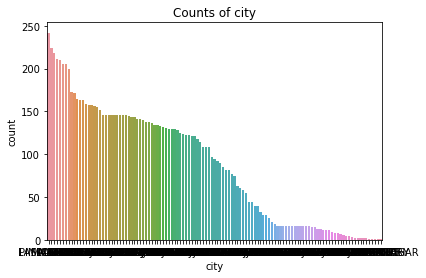

In [22]:
sns.countplot(x='city' , data= data , order = data['city'].value_counts().index)
plt.title('Counts of city')
data['city'].value_counts()

In [23]:
data[data.city == 'MUMBAI']

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
6654,MUMBAI,January,2004,267100,719,971,849,MS,MUMBAI,2004-01-01
6655,MUMBAI,January,2005,275845,261,513,387,MS,MUMBAI,2005-01-01
6656,MUMBAI,January,2006,228000,315,488,402,MS,MUMBAI,2006-01-01
6657,MUMBAI,January,2007,205200,866,1136,997,MS,MUMBAI,2007-01-01
6658,MUMBAI,January,2008,267550,348,550,448,MS,MUMBAI,2008-01-01
...,...,...,...,...,...,...,...,...,...,...
6795,MUMBAI,December,2011,290350,519,994,749,MS,MUMBAI,2011-12-01
6796,MUMBAI,December,2012,218500,1048,1609,1330,MS,MUMBAI,2012-12-01
6797,MUMBAI,December,2013,226385,1298,1976,1639,MS,MUMBAI,2013-12-01
6798,MUMBAI,December,2014,294150,1433,2178,1802,MS,MUMBAI,2014-12-01


# Perform the following tasks:

In [24]:
mth = data.month.unique()
mth

array(['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August', 'September', 'October', 'November', 'December'],
      dtype=object)

# Q1. Get the modal price of onion for each month for the Mumbai market (Hint: set monthly date as index and drop redundant columns)

In [25]:
for i in mth:
    print(data[(data.month == i ) & (data.city =="MUMBAI")])
    

      market    month  year  quantity  priceMin  priceMax  priceMod state  \
6654  MUMBAI  January  2004    267100       719       971       849    MS   
6655  MUMBAI  January  2005    275845       261       513       387    MS   
6656  MUMBAI  January  2006    228000       315       488       402    MS   
6657  MUMBAI  January  2007    205200       866      1136       997    MS   
6658  MUMBAI  January  2008    267550       348       550       448    MS   
6659  MUMBAI  January  2009    229000      1007      1513      1266    MS   
6660  MUMBAI  January  2010    247150       867      1865      1366    MS   
6661  MUMBAI  January  2011    262073      1788      3592      2660    MS   
6662  MUMBAI  January  2012    262950       409       650       546    MS   
6663  MUMBAI  January  2013    251980      1263      1677      1468    MS   
6664  MUMBAI  January  2014    246955       963      1308      1138    MS   
6665  MUMBAI  January  2015    288460      1185      1688      1443    MS   

In [26]:
# set the index as date
df = data.sort_values(by="date")
df.head()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
5399,LASALGAON(MS),January,1996,225063,160,257,226,MS,LASALGAON,1996-01-01
5420,LASALGAON(MS),February,1996,196164,133,229,186,MS,LASALGAON,1996-02-01
5441,LASALGAON(MS),March,1996,178992,155,274,243,MS,LASALGAON,1996-03-01
5461,LASALGAON(MS),April,1996,192592,136,279,254,MS,LASALGAON,1996-04-01
5481,LASALGAON(MS),May,1996,237574,154,312,269,MS,LASALGAON,1996-05-01


In [27]:
# Set the Index for the Dataframe
df.index = pd.PeriodIndex(df.date, freq='M')
df

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
date,,,,,,,,,,
1996-01,LASALGAON(MS),January,1996,225063,160,257,226,MS,LASALGAON,1996-01-01
1996-02,LASALGAON(MS),February,1996,196164,133,229,186,MS,LASALGAON,1996-02-01
1996-03,LASALGAON(MS),March,1996,178992,155,274,243,MS,LASALGAON,1996-03-01
1996-04,LASALGAON(MS),April,1996,192592,136,279,254,MS,LASALGAON,1996-04-01
1996-05,LASALGAON(MS),May,1996,237574,154,312,269,MS,LASALGAON,1996-05-01
...,...,...,...,...,...,...,...,...,...,...
2016-02,RAIPUR(CHGARH),February,2016,4300,950,1142,1077,HR,RAIPUR,2016-02-01
2016-02,INDORE(MP),February,2016,97178,104,856,575,MP,INDORE,2016-02-01
2016-02,YEOLA(MS),February,2016,272527,347,984,730,MS,YEOLA,2016-02-01


# Visualization of prices over time

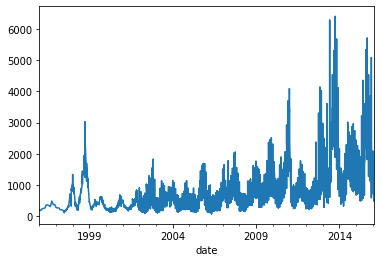

In [28]:
df.priceMod.plot()
plt.show()

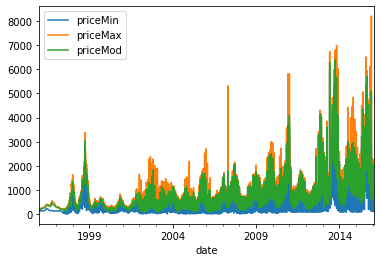

In [29]:
df.plot(kind="line", y=["priceMin" ,"priceMax" ,"priceMod"])
plt.show()

# To calculate the range of change, we will create a new price difference variable - which is the difference between the priceMin and priceMax

In [30]:
df["priceDiff"] = df["priceMax"] - df["priceMin"]
df

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date,priceDiff
date,,,,,,,,,,,
1996-01,LASALGAON(MS),January,1996,225063,160,257,226,MS,LASALGAON,1996-01-01,97
1996-02,LASALGAON(MS),February,1996,196164,133,229,186,MS,LASALGAON,1996-02-01,96
1996-03,LASALGAON(MS),March,1996,178992,155,274,243,MS,LASALGAON,1996-03-01,119
1996-04,LASALGAON(MS),April,1996,192592,136,279,254,MS,LASALGAON,1996-04-01,143
1996-05,LASALGAON(MS),May,1996,237574,154,312,269,MS,LASALGAON,1996-05-01,158
...,...,...,...,...,...,...,...,...,...,...,...
2016-02,RAIPUR(CHGARH),February,2016,4300,950,1142,1077,HR,RAIPUR,2016-02-01,192
2016-02,INDORE(MP),February,2016,97178,104,856,575,MP,INDORE,2016-02-01,752
2016-02,YEOLA(MS),February,2016,272527,347,984,730,MS,YEOLA,2016-02-01,637


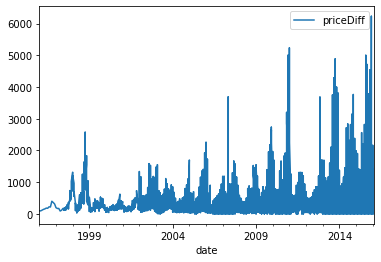

In [31]:
df.plot(y="priceDiff")
plt.show()

In [32]:
# a new column for the intger month
df["monthVal"] = pd.DatetimeIndex(df["date"]).month
df

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date,priceDiff,monthVal
date,,,,,,,,,,,,
1996-01,LASALGAON(MS),January,1996,225063,160,257,226,MS,LASALGAON,1996-01-01,97,1
1996-02,LASALGAON(MS),February,1996,196164,133,229,186,MS,LASALGAON,1996-02-01,96,2
1996-03,LASALGAON(MS),March,1996,178992,155,274,243,MS,LASALGAON,1996-03-01,119,3
1996-04,LASALGAON(MS),April,1996,192592,136,279,254,MS,LASALGAON,1996-04-01,143,4
1996-05,LASALGAON(MS),May,1996,237574,154,312,269,MS,LASALGAON,1996-05-01,158,5
...,...,...,...,...,...,...,...,...,...,...,...,...
2016-02,RAIPUR(CHGARH),February,2016,4300,950,1142,1077,HR,RAIPUR,2016-02-01,192,2
2016-02,INDORE(MP),February,2016,97178,104,856,575,MP,INDORE,2016-02-01,752,2
2016-02,YEOLA(MS),February,2016,272527,347,984,730,MS,YEOLA,2016-02-01,637,2


# Q2. Build time series model and check the performance of the model using RMSE

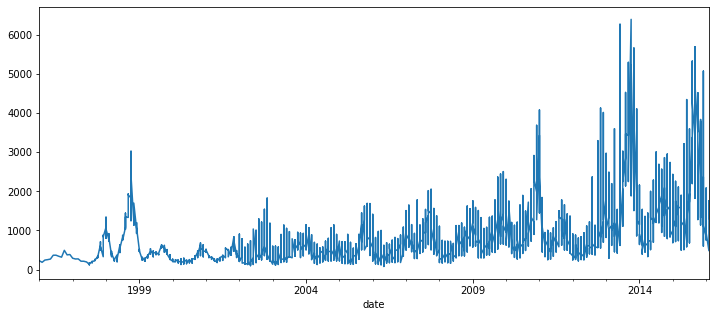

In [33]:
df['priceMod'].plot(figsize=(12,5))

In [34]:
from statsmodels.tsa.stattools import adfuller

In [35]:
def adf_test(dataset):
     dftest = adfuller(dataset, autolag = 'AIC')
     print("1. ADF : ",dftest[0])
     print("2. P-Value : ", dftest[1])
     print("3. Num Of Lags : ", dftest[2])
     print("4. Num Of Observations Used For ADF Regression:",      dftest[3])
     print("5. Critical Values :")
     for key, val in dftest[4].items():
         print("\t",key, ": ", val)
adf_test(df['priceMod'])

1. ADF :  -3.2642177567854884
2. P-Value :  0.016555698639841177
3. Num Of Lags :  32
4. Num Of Observations Used For ADF Regression: 10194
5. Critical Values :
	 1% :  -3.430991646794122
	 5% :  -2.8618235703087764
	 10% :  -2.566920939332377


In [36]:
#function to check data stationarity
def checkstationarity(data):
    #adfuller() return the following :
    #test statistic,pvalue,lags,total observations
    
    pval = adfuller(data)[1]
    
    if pval> 0.05:
        msg="pvalue = {}. Data not stationary".format(pval)
    else:
        msg="pvalue = {}. Data  stationary".format(pval)
    return(msg)


In [37]:
#check for data stationarity
checkstationarity(df['priceMod'])

'pvalue = 0.016555698639841177. Data  stationary'

In [38]:
from pmdarima import auto_arima
stepwise_fit = auto_arima(df['priceMod'], trace=True,
suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=147694.176, Time=11.59 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=153620.512, Time=0.17 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=150375.033, Time=0.40 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=147707.990, Time=1.98 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=153618.512, Time=0.09 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=147698.741, Time=8.44 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=147696.236, Time=6.13 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=147682.601, Time=10.91 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=147698.213, Time=8.19 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=147682.697, Time=14.79 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=147677.076, Time=7.69 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=147664.007, Time=12.88 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=147699.456, Time=6.36 sec
 ARIMA(2,1,4)(0,0,0)[0] intercept   : AIC=147676.316, Time=10.47 sec


In [39]:
print(df.shape)
train=df.iloc[:-30]
test=df.iloc[-30:]
print(train.shape,test.shape)

(10227, 12)
(10197, 12) (30, 12)


In [40]:
from statsmodels.tsa.arima_model import ARIMA
model=ARIMA(train['priceMod'],order=(2,1,3))
model=model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:             D.priceMod   No. Observations:                10196
Model:                 ARIMA(2, 1, 3)   Log Likelihood              -73614.807
Method:                       css-mle   S.D. of innovations            330.617
Date:                Sat, 10 Apr 2021   AIC                         147243.615
Time:                        00:46:53   BIC                         147294.223
Sample:                    02-29-1996   HQIC                        147260.729
                         - 02-29-2016                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0661      0.459      0.144      0.886      -0.834       0.966
ar.L1.D.priceMod    -1.6757      0.025    -66.223      0.000      -1.725      -1.626
ar.L2.D.priceMod    -0.9226      0.021    -43.263      0.000      -0.964      -0.881
ma.L1.D.priceMod     0.7964      0.026     30.686      0.000       0.745       0.847
ma.L2.D.priceMod    -0.5073      0.015    -34.021      0.000      -0.537      -0.478
ma.L3.D.priceMod    -0.7846      0.019    -40.405      0.000      -0.823      -0.746
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -0.9081           -0.5091j            1.0411           -0.4187
AR.2           -0.9081           +0.5091j            1.0411            0.4187
MA.1            1.1646           -0.0000j            1.1646           -0.0000
MA.2           -0.9056           -0.5237j            1.0462           -0.4166
MA.3           -0.9056           +0.5237j            1.0462            0.4166
-----------------------------------------------------------------------------
"""

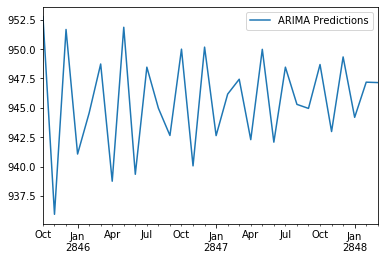

In [41]:
start=len(train)
end=len(train)+len(test)-1
pred=model.predict(start=start,end=end,typ='levels').rename('ARIMA Predictions')
pred.plot(legend=True)


# RMSE

In [42]:
from sklearn.metrics import mean_squared_error
from math import sqrt
test['priceMod'].mean()
rmse=sqrt(mean_squared_error(pred,test['priceMod']))
print(rmse)

231.4592086794771


# Q3. Plot ACF and PACF plots

C:\Users\mayur\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:572: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning


Text(0, 0.5, 'Correlation')

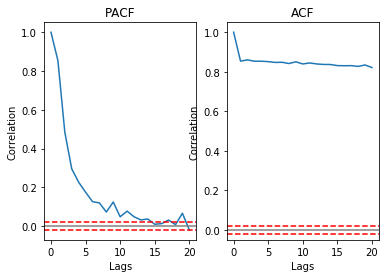

In [43]:
#plot the Correlogram to identify the p and q (lags for AR and MA process)

#get the PACF and ACF lag values 
lags_pacf = pacf(df.priceMod, nlags=20)
lags_acf = acf(df.priceMod, nlags=20)

#PACF  ->to identify p
plt.subplot(121)
plt.plot(lags_pacf)
plt.axhline(y=0,linestyle="-",color='grey')
plt.axhline(y=-1.96/np.sqrt(len(df.priceMod)),linestyle='--',color='red')
plt.axhline(y=1.96/np.sqrt(len(df.priceMod)),linestyle='--',color='red')
plt.title('PACF')
plt.xlabel('Lags')
plt.ylabel('Correlation')

#ACF  -> to identify q
plt.subplot(122)
plt.plot(lags_acf)
plt.axhline(y=0,linestyle="-",color='grey')
plt.axhline(y=-1.96/np.sqrt(len(df.priceMod)),linestyle='--',color='red')
plt.axhline(y=1.96/np.sqrt(len(df.priceMod)),linestyle='--',color='red')
plt.title('ACF')
plt.xlabel('Lags')
plt.ylabel('Correlation')



Text(0, 0.5, 'Correlation')

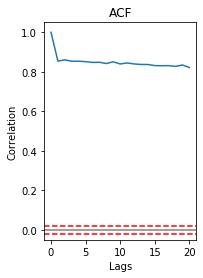

In [44]:
#ACF  -> to identify q
plt.subplot(122)
plt.plot(lags_acf)
plt.axhline(y=0,linestyle="-",color='grey')
plt.axhline(y=-1.96/np.sqrt(len(df.priceMod)),linestyle='--',color='red')
plt.axhline(y=1.96/np.sqrt(len(df.priceMod)),linestyle='--',color='red')
plt.title('ACF')
plt.xlabel('Lags')
plt.ylabel('Correlation')


In [45]:
df.priceMod = df.priceMod.astype('float64')

In [46]:
p=0; q=0; d=0

#Build the ARIMA model 
m1= ARIMA(df.priceMod,order=(p,d,q)).fit(disp=0)

In [47]:
m1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:               priceMod   No. Observations:                10227
Model:                     ARMA(0, 0)   Log Likelihood              -83107.959
Method:                           css   S.D. of innovations            818.431
Date:                Sat, 10 Apr 2021   AIC                         166219.917
Time:                        00:51:06   BIC                         166234.383
Sample:                    01-31-1996   HQIC                        166224.808
                         - 02-29-2016                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        984.2843      8.093    121.622      0.000     968.422    1000.146
==============================================================================
"""

Text(0.5, 1.0, 'ARIMA model residuals')

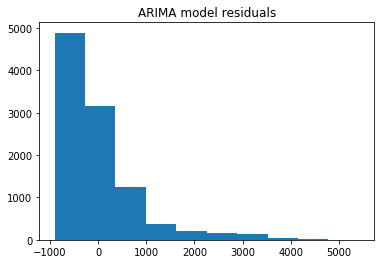

In [48]:
#LJung-Box test to check the model goodness (error should have white noise )
plt.hist(m1.resid)
plt.title('ARIMA model residuals')

In [49]:
#1) mean of residuals =0
print(m1.resid.mean())

3.090999160069896e-11


In [50]:
#LJung-Box test to check the model goodness
#H0: residuals are independently distributed
#H1: residuals are independently distributed 

pvalue = sm.stats.acorr_ljungbox(m1.resid,lags=[1])[1]

C:\Users\mayur\anaconda3\lib\site-packages\statsmodels\stats\diagnostic.py:524: FutureWarning: The value returned will change to a single DataFrame after 0.12 is released.  Set return_df to True to use to return a DataFrame now.  Set return_df to False to silence this warning.
  warnings.warn(msg, FutureWarning)


In [51]:
if  pvalue > 0.05:
    print("FTR H0: Residuals are independently distributed")
else:
    print("Reject H0: Residuals are not independently distributed")
    

Reject H0: Residuals are not independently distributed


In [52]:
#forecast for the next 12 months 
f1=m1.forecast(steps=12)
f1

(array([984.28434536, 984.28434536, 984.28434536, 984.28434536,
        984.28434536, 984.28434536, 984.28434536, 984.28434536,
        984.28434536, 984.28434536, 984.28434536, 984.28434536]),
 array([818.43148184, 818.43148184, 818.43148184, 818.43148184,
        818.43148184, 818.43148184, 818.43148184, 818.43148184,
        818.43148184, 818.43148184, 818.43148184, 818.43148184]),
 array([[-619.81188285, 2588.38057357],
        [-619.81188285, 2588.38057357],
        [-619.81188285, 2588.38057357],
        [-619.81188285, 2588.38057357],
        [-619.81188285, 2588.38057357],
        [-619.81188285, 2588.38057357],
        [-619.81188285, 2588.38057357],
        [-619.81188285, 2588.38057357],
        [-619.81188285, 2588.38057357],
        [-619.81188285, 2588.38057357],
        [-619.81188285, 2588.38057357],
        [-619.81188285, 2588.38057357]]))

In [53]:
#the actual forecasted values are the first set of values in the output
forecast = f1[0]
print(forecast)
len(forecast)

[984.28434536 984.28434536 984.28434536 984.28434536 984.28434536
 984.28434536 984.28434536 984.28434536 984.28434536 984.28434536
 984.28434536 984.28434536]


12

# Q4. Exponential smoothing using Holt-Winter’s technique and Forecast onion price for Mumbai market

In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [ ]:
import matplotlib.pylab as plt
from matplotlib.pylab import rcParams
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [ ]:
# Make Holt-winter model using train data
hwmodel = ExponentialSmoothing(train.priceMod,trend='add', seasonal='mul',seasonal_periods=4).fit()

In [ ]:
# Prediction for 12 months
test_pred = hwmodel.forecast(12)

In [ ]:
test_pred

In [ ]:
# Plot prediction with actual , test and holt-winter techinc test
train['priceMod'].plot(legend=True,label='Train', figsize=(10,6))
test['priceMod'].plot(legend=True, label='Test')

test_pred.plot(legend=True, label='Prediction_test')

In [ ]:
# Make another Holt-winter final model on entire data
final_m = ExponentialSmoothing(df.priceMod,trend='add', seasonal='mul',seasonal_periods=4).fit()

In [ ]:
# Predict for next 12 month
pred_f = final_m.forecast(12)
pred_f

In [ ]:
# Plot Prediction
mumbai['priceMod'].plot(legend=True,label='price', figsize=(10,6))
pred_f.plot(legend='True', label='Prediction')